### __Natural Language Processing with Disaster Tweets__
#### _Predict which Tweets are about real disasters and which ones are not_
> - https://www.kaggle.com/competitions/nlp-getting-started/overview/description

In [1]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
import random
from collections import Counter
from PIL import Image
import random
import string
from joblib import Parallel, delayed
import math

import warnings
warnings.filterwarnings('ignore')

# import packages for sentiment analysis
from textblob import TextBlob
from wordcloud import WordCloud

# import regex
import re

# import nltk
import nltk 
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('jan_aug_tempanom.png'))

# import seaborn
import seaborn as sns

# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

# import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB # Bernoulli because we have binary features
from sklearn.pipeline import Pipeline

# For converting words into frequency counts
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler

#for showing 2D plot
%matplotlib inline    

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### __Import Data__

In [2]:
# import train data
test_df = pd.read_csv('../data/test.csv')
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [58]:
# import train data
train_df = pd.read_csv('../data/train.csv')
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [59]:
# check for missing data
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

#### __Check the Proportion of Target Class__

In [60]:
# checking balance of target class
train_df['target'].value_counts()                 # in numbers
train_df['target'].value_counts()/len(train_df)   # in %

# print each target class proportion in %
perc_0 = (train_df['target'].value_counts()/len(train_df))[0]
perc_1 = (train_df['target'].value_counts()/len(train_df))[1]

print(f"\ntarget class 0 = {round(perc_0*100, 2)} % | target class 1 = {round(perc_1*100, 2)} %")

0    4342
1    3271
Name: target, dtype: int64

0    0.57034
1    0.42966
Name: target, dtype: float64


target class 0 = 57.03 % | target class 1 = 42.97 %


__Matplotlib Bar Plot:__
> - https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
> - https://python-graph-gallery.com/3-control-color-of-barplots
> - https://moonbooks.org/Articles/How-to-plot-a-bar-chart-with-a-colorbar-using-matplotlib-in-python-/
> - https://matplotlib.org/stable/gallery/color/colormap_reference.html
> - https://pythonguides.com/matplotlib-bar-chart-labels/

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, '%')

Text(0.5, 1.0, 'Target Class Balance')

[Text(0, 0, '57.03'), Text(0, 0, '42.97')]

<Figure size 720x720 with 0 Axes>

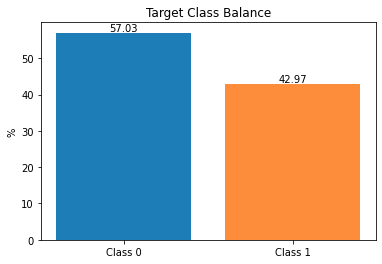

In [8]:
# Plot Bar Plot of Target Class

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

# creating the dataset
data = {'Class 0': round(perc_0*100, 2), 'Class 1': round(perc_1*100, 2)}
classes = list(data.keys())
values = list(data.values())

cmap_blue = plt.cm.get_cmap('GnBu')
blue = cmap_blue(0.8)

cmap_org = plt.cm.get_cmap('Oranges')
orange = cmap_org(0.5)

p1 = ax.bar(classes, values, color=[blue, orange])
ax.set_ylabel('%')
ax.set_title('Target Class Balance')
ax.set_xticks(classes)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

### __EDA - Exploratory Data Analysis__

#### __Check Variable Values__

In [9]:
train_df['keyword'].value_counts()
train_df['location'].value_counts()

print(f"\nkeyword: {train_df['keyword'].nunique()} | {train_df['keyword'].unique()}")
print(f"\nlocation: {train_df['location'].nunique()} | {train_df['location'].unique()}")

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64


keyword: 221 | [nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'd

### __Data Preprocessing__

#### Text Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

#### __Reference Links:__
> - https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
> - https://goodboychan.github.io/python/datacamp/natural_language_processing/2020/07/17/04-TF-IDF-and-similarity-scores.html
> - https://notebook.community/ianozsvald/word2vec_sentences_vs_target_sentence_demo/word2vec%20similarity%20example

In [61]:
# testing url removal
text = train_df['text'][7610]
text
text1 = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
text1
text2 = re.sub(r'^http:\/\/.*[\r\n]*', '', text1, flags=re.MULTILINE)
text2
text3 = re.sub(r'.http:\/\/.*[\r\n]*', '', text2, flags=re.MULTILINE)
text3

'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ'

'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ'

'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ'

'M1.94 [01:04 UTC]?5km S of Volcano Hawaii.'

In [62]:
# function for removing any url within string
def remove_url(text):
    
    text1 = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text2 = re.sub(r'^http:\/\/.*[\r\n]*', '', text1, flags=re.MULTILINE)
    text3 = re.sub(r'.http:\/\/.*[\r\n]*', '', text2, flags=re.MULTILINE)
    text4 = re.sub(r'.https?:\/\/.*[\r\n]*', '', text3, flags=re.MULTILINE)
    
    return text4

In [63]:
remove_url(text)

'M1.94 [01:04 UTC]?5km S of Volcano Hawaii.'

In [22]:
# function that splits a sentence to a list of words
def words_split(text):
    # split into words by white space
    words = text.split()
    
    return words

In [23]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
# function for removing punctuations
def remove_punc(words):

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped_words = [w.translate(table) for w in words]
    
    return stripped_words

In [25]:
# function for normalizing texts
def normalize(words):

    # convert to lower case
    words = [word.lower() for word in words]
    
    return words

In [26]:
!pip install unidecode

In [27]:
import unidecode
s = u'Ábcdêãçoàúü'
n = 'Ábcdêãçoàúü'
unidecode.unidecode(s)
unidecode.unidecode(n)

'Abcdeacoauu'

'Abcdeacoauu'

In [28]:
# function for removing stop words
def remove_unicode(words):

    words = [unidecode.unidecode(w) for w in words]
    
    return words

In [29]:
import re
s = "There are only 4 classes left."
re.sub(r'\d+', '', s)

'There are only  classes left.'

In [30]:
# function for removing numbers
def remove_numbers(words):

    words = [re.sub(r'\d+', '', w) for w in words]
    
    return words

In [31]:
!pip install pattern

In [33]:
from pattern.en import suggest

suggest(u'caar')
suggest(u'mussage')
suggest(u'survice')
suggest(u'hte')
suggest(u"wisky")

[('car', 0.5), ('czar', 0.42857142857142855), ('saar', 0.07142857142857142)]

[('message', 0.6216216216216216), ('massage', 0.3783783783783784)]

[('service', 0.9253112033195021), ('survive', 0.07468879668049792)]

[('the', 0.8653201565642368),
 ('he', 0.13408515883485067),
 ('ate', 0.00022706139307570876),
 ('hate', 0.0002162489457863893),
 ('hue', 0.00012974936747183358),
 ('te', 1.0812447289319465e-05),
 ('htm', 1.0812447289319465e-05)]

[('whisky', 0.9333333333333333), ('risky', 0.06666666666666667)]

In [34]:
suggest(u'caar')[0][0]
w = 'mussage'
suggest(w)[0][0]

'car'

'message'

In [35]:
# function for spelling check
def spell_check(words):

    words = [suggest(w)[0][0] for w in words]
    
    return words

In [36]:
# function for removing stop words
def remove_stopwords(words):

    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    return words

In [37]:
# function for lemmatizing texts
def lemmatize(words):

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words

In [38]:
# function:
def stem_text(words):

    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    
    return stemmed

In [64]:
# function for preprocessing all the steps above
def preprocess_all(text):
    
    no_url = remove_url(text)
    words = words_split(no_url)
    no_numbers = remove_numbers(words)
    no_unicode = remove_unicode(no_numbers)
    words_no_punc = remove_punc(no_unicode)
    words_normalized = normalize(words_no_punc)
    #words_spellchecked = spell_check(words_normalized)
    no_stop__words = remove_stopwords(words_normalized)
    lemmatized = lemmatize(no_stop__words)
    sentence = " ".join(lemmatized)
    sentence = " ".join(sentence.split())
    #preprocessed_words = stem_text(lemmatized)
    
    return sentence

In [65]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

quick_test = [preprocess_all(data) for data in train_df['text'][:5]]
quick_test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school']

In [66]:
# Preprocess quora question 1

# start time to measure the time of the program execution
start_time = time.time()

train_df['text_preprocessed'] = train_df['text'].apply(preprocess_all)

# check
train_df.info()
train_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 7613 non-null   int64 
 1   keyword            7552 non-null   object
 2   location           5080 non-null   object
 3   text               7613 non-null   object
 4   target             7613 non-null   int64 
 5   text_preprocessed  7613 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


,id,keyword,location,text,target,text_preprocessed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utckm volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...




--- 77.34818863868713 seconds ---


In [75]:
train_df[train_df['text_preprocessed'].str.len() < 4]
train_df['text'][70]

,id,keyword,location,text,target,text_preprocessed
30,44,NaN,NaN,The end!,0,end
70,100,accident,UK,http://t.co/GKYe6gjTk5 Had a #personalinjury a...,0,
172,247,ambulance,Jackson,http://t.co/AY6zzcUpnz Twelve feared killed in...,1,
183,262,ambulance,Amsterdam,http://t.co/7xGLah10zL Twelve feared killed in...,1,
190,269,ambulance,NaN,http://t.co/FCqmKFfflW Twelve feared killed in...,1,
197,277,ambulance,L. A.,http://t.co/pWwpUm6RBj Twelve feared killed in...,1,
201,283,ambulance,Lexington,http://t.co/FueRk0gWui Twelve feared killed in...,1,
202,285,ambulance,NaN,http://t.co/X5YEUYLT1X Twelve feared killed in...,1,
207,293,ambulance,Playa,http://t.co/J8TYT1XRRK Twelve feared killed in...,1,
448,651,attack,NaN,http://t.co/pTKrXtZjtV Nashville Theater Atta...,1,


'http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour'

#### __Analyze Text Statistics__
> - Reference Links: 
    * https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
    * https://stackoverflow.com/questions/29216889/slicing-a-dictionary
    * https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    * https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-1.php
    * https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
    * https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    * https://www.analyticsvidhya.com/blog/2021/11/pattern-library-for-natural-language-processing-in-python/
    * https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public

<AxesSubplot:>

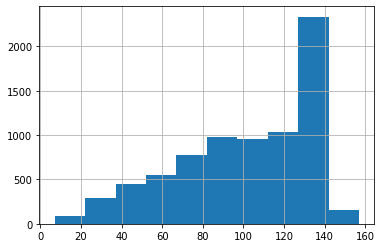

In [10]:
# the number of characters present in each sentence
# rough idea about the text length
train_df['text'].str.len().hist()

twitter text ranges between 10 and 155 characters, heavy concentraion around 130-140 characters.

<AxesSubplot:>

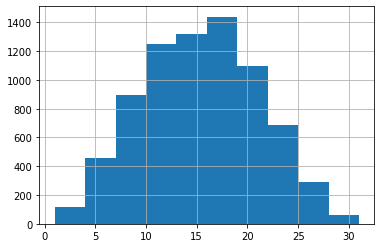

In [11]:
# plot the number of words appearing in each tweet.
train_df['text'].str.split().\
    map(lambda x: len(x)).\
    hist()

twitter text ranges between 2 and 32 words, heavy concentraion around 12-18 words.

<AxesSubplot:>

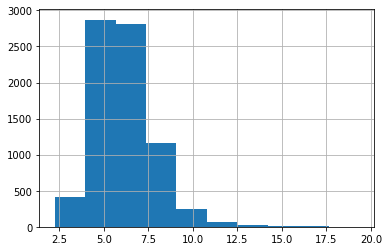

In [12]:
# check the average word length in each sentence.
train_df['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

the average words of twitter text ranges between 2.5 and 17.5 words, heavy concentraion around 4-8 words.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

{'the': 2575,
 'a': 1845,
 'to': 1805,
 'in': 1757,
 'of': 1722,
 'and': 1302,
 'is': 814,
 'on': 773,
 'that': 492,
 'by': 469,
 'from': 372,
 'are': 345,
 'this': 335,
 'as': 282,
 'so': 239,
 'an': 204,
 'or': 181,
 'all': 178,
 'into': 162,
 'can': 141,
 'now': 101,
 'our': 72,
 'being': 67,
 'other': 31,
 'both': 20}

<Figure size 1008x432 with 0 Axes>

<BarContainer object of 25 artists>

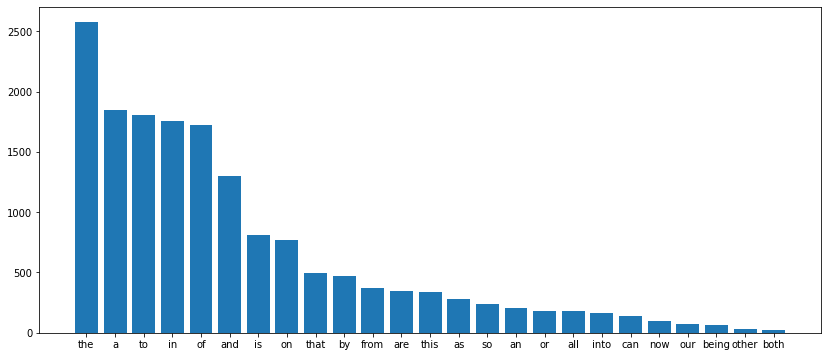



--- 33.10424828529358 seconds ---


In [19]:
# Analyzing the amount and the types of stopwords for good insights into the data

# start time to measure the time of the program execution
start_time = time.time()

import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

corpus=[]
new= train_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

# slice & sort by values dictionary before plot
import itertools
import operator

dic_sliced = dict(itertools.islice(dic.items(), 25))
dic_sorted = dict( sorted(dic_sliced.items(), key=operator.itemgetter(1), reverse=True))
dic_sorted

# plot bar graph
# function to add value labels
#def addlabels(x,y):
#    for i in range(len(x)):
#        plt.text(i, y[i], y[i], ha = 'center')
        
plt.figure(figsize=(14, 6))
plt.bar(dic_sorted.keys(), dic_sorted.values())
# calling the function to add value labels
#addlabels(dic_sorted.keys(), dic_sorted.values())
plt.show()        
# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '763'),
 Text(0, 0, '341'),
 Text(0, 0, '295'),
 Text(0, 0, '237'),
 Text(0, 0, '227'),
 Text(0, 0, '215'),
 Text(0, 0, '214'),
 Text(0, 0, '214'),
 Text(0, 0, '209'),
 Text(0, 0, '179'),
 Text(0, 0, '174'),
 Text(0, 0, '147'),
 Text(0, 0, '145'),
 Text(0, 0, '142'),
 Text(0, 0, '141'),
 Text(0, 0, '128'),
 Text(0, 0, '127'),
 Text(0, 0, '126')]



--- 3.0937209129333496 seconds ---


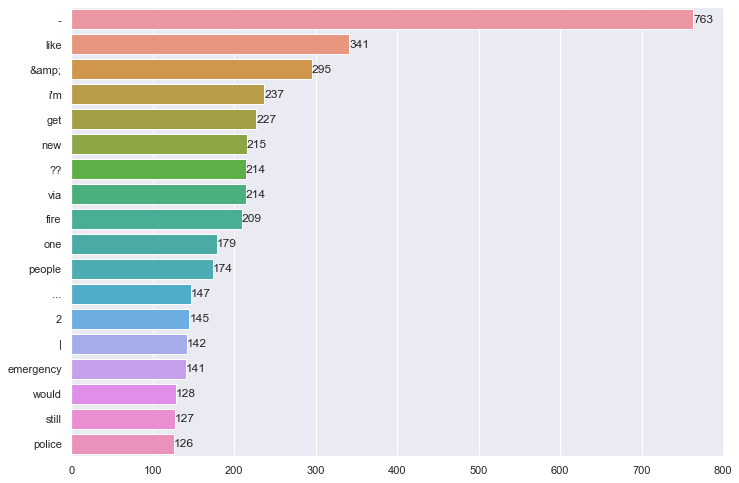

In [67]:
# count the most frequent words other than stop words

# start time to measure the time of the program execution
start_time = time.time()

# Converting to Lowercase
#corpus = [char.lower() for char in corpus]

import collections
from collections import Counter

corpus2=[]
new= train_df['text_preprocessed'].str.split()
new=new.values.tolist()
corpus2=[word for i in new for word in i]

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:80]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=y,y=x)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")